In [484]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

%matplotlib inline

In [485]:
loan_df = pd.read_csv(r'C:\Users\Samya\Downloads\loan.csv')

D:\Softwares\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning:

Columns (47) have mixed types.Specify dtype option on import or set low_memory=False.



In [486]:
print(loan_df.head(10))

        id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
0  1077501    1296599       5000         5000           4975.0   36 months   
1  1077430    1314167       2500         2500           2500.0   60 months   
2  1077175    1313524       2400         2400           2400.0   36 months   
3  1076863    1277178      10000        10000          10000.0   36 months   
4  1075358    1311748       3000         3000           3000.0   60 months   
5  1075269    1311441       5000         5000           5000.0   36 months   
6  1069639    1304742       7000         7000           7000.0   60 months   
7  1072053    1288686       3000         3000           3000.0   36 months   
8  1071795    1306957       5600         5600           5600.0   60 months   
9  1071570    1306721       5375         5375           5350.0   60 months   

  int_rate  installment grade sub_grade  ... num_tl_90g_dpd_24m  \
0   10.65%       162.87     B        B2  ...                NaN   
1   15.

In [487]:
# checking for null valus
loan_df.isnull().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 111, dtype: int64

In [488]:
print(loan_df.isnull().all(axis=0).sum()) # for columns
print(loan_df.isnull().all(axis=1).sum()) # for rows

54
0


In [489]:
# need to drop cols with all NA
loan_df.dropna(axis=1, how='all', inplace=True)

In [490]:
print(loan_df.head(10))

        id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
0  1077501    1296599       5000         5000           4975.0   36 months   
1  1077430    1314167       2500         2500           2500.0   60 months   
2  1077175    1313524       2400         2400           2400.0   36 months   
3  1076863    1277178      10000        10000          10000.0   36 months   
4  1075358    1311748       3000         3000           3000.0   60 months   
5  1075269    1311441       5000         5000           5000.0   36 months   
6  1069639    1304742       7000         7000           7000.0   60 months   
7  1072053    1288686       3000         3000           3000.0   36 months   
8  1071795    1306957       5600         5600           5600.0   60 months   
9  1071570    1306721       5375         5375           5350.0   60 months   

  int_rate  installment grade sub_grade  ... next_pymnt_d last_credit_pull_d  \
0   10.65%       162.87     B        B2  ...          NaN    

In [491]:
loan_df.isnull().sum() # from this chart, we will do further data cleaning

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
term                              0
int_rate                          0
installment                       0
grade                             0
sub_grade                         0
emp_title                      2459
emp_length                     1075
home_ownership                    0
annual_inc                        0
verification_status               0
issue_d                           0
loan_status                       0
pymnt_plan                        0
url                               0
desc                          12940
purpose                           0
title                            11
zip_code                          0
addr_state                        0
dti                               0
delinq_2yrs                       0
earliest_cr_line                  0
inq_last_6mths              

In [492]:
# checking for any duplicate row
dup_row = loan_df.duplicated(['id'])
print(dup_row.value_counts())

False    39717
dtype: int64


In [493]:
# dropping other cols with mostly nulls and irrelevent
cols_drop = ["id", "member_id", "funded_amnt", "emp_title", "pymnt_plan", "url", "desc", "title", "zip_code", "delinq_2yrs", 
             "mths_since_last_delinq", "mths_since_last_record", "revol_bal", "initial_list_status", "out_prncp", 
             "out_prncp_inv", "total_pymnt", "total_pymnt_inv", "total_rec_prncp", "total_rec_int", "total_rec_late_fee", 
             "recoveries", "collection_recovery_fee", "last_pymnt_d", "last_pymnt_amnt", "next_pymnt_d", "last_credit_pull_d", 
             "collections_12_mths_ex_med", "policy_code", "acc_now_delinq", "chargeoff_within_12_mths", "delinq_amnt", 
             "tax_liens", "application_type", "pub_rec_bankruptcies"]
loan_df.drop(labels=cols_drop, axis=1, inplace=True)

In [494]:
print(loan_df.shape)

(39717, 22)


In [495]:
loan_df.isnull().sum()

loan_amnt                 0
funded_amnt_inv           0
term                      0
int_rate                  0
installment               0
grade                     0
sub_grade                 0
emp_length             1075
home_ownership            0
annual_inc                0
verification_status       0
issue_d                   0
loan_status               0
purpose                   0
addr_state                0
dti                       0
earliest_cr_line          0
inq_last_6mths            0
open_acc                  0
pub_rec                   0
revol_util               50
total_acc                 0
dtype: int64

In [496]:
loan_df = loan_df[loan_df.loan_status != 'Current'] #Dropping loan status with current value as this is not a deciding factor
print(loan_df.loan_status.head(10))
print(loan_df.shape)

0      Fully Paid
1     Charged Off
2      Fully Paid
3      Fully Paid
5      Fully Paid
6      Fully Paid
7      Fully Paid
8     Charged Off
9     Charged Off
10     Fully Paid
Name: loan_status, dtype: object
(38577, 22)


In [497]:
loan_df.issue_d = pd.to_datetime(loan_df.issue_d, format='%b-%y')
loan_df['year']=loan_df['issue_d'].dt.year
loan_df['month']=loan_df['issue_d'].dt.month

loan_df.head()

,loan_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,...,addr_state,dti,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_util,total_acc,year,month
0,5000,4975.0,36 months,10.65%,162.87,B,B2,10+ years,RENT,24000.0,...,AZ,27.65,Jan-85,1,3,0,83.70%,9,2011,12
1,2500,2500.0,60 months,15.27%,59.83,C,C4,< 1 year,RENT,30000.0,...,GA,1.00,Apr-99,5,3,0,9.40%,4,2011,12
2,2400,2400.0,36 months,15.96%,84.33,C,C5,10+ years,RENT,12252.0,...,IL,8.72,Nov-01,2,2,0,98.50%,10,2011,12
3,10000,10000.0,36 months,13.49%,339.31,C,C1,10+ years,RENT,49200.0,...,CA,20.00,Feb-96,1,10,0,21%,37,2011,12
5,5000,5000.0,36 months,7.90%,156.46,A,A4,3 years,RENT,36000.0,...,AZ,11.20,Nov-04,3,9,0,28.30%,12,2011,12


In [498]:
loan_df.dropna(axis=0, subset=["emp_length"], inplace=True)
loan_df.dropna(axis=0, subset=["revol_util"], inplace=True)

In [499]:
loan_df['emp_length']=loan_df.emp_length.str.extract('(\d+)') # keepig only numbers

In [500]:
loan_df['int_rate'] = loan_df['int_rate'].str.rstrip('%')
loan_df['revol_util'] = loan_df['revol_util'].str.rstrip('%')

In [501]:
col_obj_to_num = ['int_rate', 'revol_util', 'emp_length']
loan_df[col_obj_to_num] = loan_df[col_obj_to_num].apply(pd.to_numeric)

In [502]:
loan_df.describe()

,loan_amnt,funded_amnt_inv,int_rate,installment,emp_length,annual_inc,dti,inq_last_6mths,open_acc,pub_rec,revol_util,total_acc,year,month
count,37497.000000,37497.000000,37497.000000,37497.000000,37497.000000,3.749700e+04,37497.000000,37497.000000,37497.000000,37497.000000,37497.000000,37497.000000,37497.000000,37497.000000
mean,11127.362856,10288.801951,11.958772,324.858107,5.063312,6.943653e+04,13.288131,0.872390,9.304264,0.053738,48.861742,22.098035,2010.299517,7.113902
std,7353.972102,7033.947315,3.682062,208.906836,3.402219,6.467208e+04,6.659208,1.071211,4.394866,0.234659,28.341493,11.413448,0.888599,3.410075
min,500.000000,0.000000,5.420000,15.690000,1.000000,4.000000e+03,0.000000,0.000000,2.000000,0.000000,0.000000,2.000000,2007.000000,1.000000
25%,5500.000000,5000.000000,8.940000,167.530000,2.000000,4.100000e+04,8.160000,0.000000,6.000000,0.000000,25.400000,13.000000,2010.000000,4.000000
50%,10000.000000,8875.000000,11.830000,280.260000,4.000000,6.000000e+04,13.390000,1.000000,9.000000,0.000000,49.300000,20.000000,2011.000000,7.000000
75%,15000.000000,14100.000000,14.420000,429.350000,9.000000,8.300000e+04,18.550000,1.000000,12.000000,0.000000,72.400000,29.000000,2011.000000,10.000000
max,35000.000000,35000.000000,24.400000,1305.190000,10.000000,6.000000e+06,29.990000,8.000000,44.000000,4.000000,99.900000,90.000000,2011.000000,12.000000


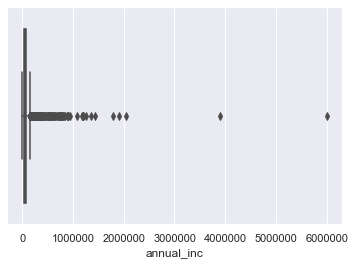

In [503]:
# we see there is a significant difference in max and third quartile, so outliers must be handled
sns.boxplot(loan_df.annual_inc)

In [504]:
annual_inc_cutoff = loan_df["annual_inc"].quantile(0.99)
loan_df = loan_df[loan_df["annual_inc"] < annual_inc_cutoff]

loan_amnt_cutoff = loan_df["loan_amnt"].quantile(0.99)
loan_df = loan_df[loan_df["loan_amnt"] < loan_amnt_cutoff]

open_acc_cutoff = loan_df["open_acc"].quantile(0.99)
loan_df = loan_df[loan_df["open_acc"] < open_acc_cutoff]

total_acc_cutoff = loan_df["total_acc"].quantile(0.99)
loan_df = loan_df[loan_df["total_acc"] < total_acc_cutoff]

pub_rec_cutoff = loan_df["pub_rec"].quantile(0.99)
loan_df = loan_df[loan_df["pub_rec"] <= pub_rec_cutoff]


In [505]:
loan_df.describe()

,loan_amnt,funded_amnt_inv,int_rate,installment,emp_length,annual_inc,dti,inq_last_6mths,open_acc,pub_rec,revol_util,total_acc,year,month
count,35670.000000,35670.000000,35670.000000,35670.000000,35670.000000,35670.000000,35670.000000,35670.000000,35670.000000,35670.000000,35670.000000,35670.000000,35670.000000,35670.000000
mean,10656.855200,9872.262492,11.847697,312.618705,5.009812,64759.100866,13.274746,0.859882,8.998738,0.051696,48.997503,21.196299,2010.290833,7.106560
std,6705.852871,6445.496226,3.618927,193.382307,3.387000,34390.840178,6.649719,1.061665,3.975672,0.221416,28.360266,10.345265,0.889929,3.416272
min,500.000000,0.000000,5.420000,15.690000,1.000000,4000.000000,0.000000,0.000000,2.000000,0.000000,0.000000,2.000000,2007.000000,1.000000
25%,5200.000000,5000.000000,8.940000,165.380000,2.000000,40000.000000,8.160000,0.000000,6.000000,0.000000,25.600000,13.000000,2010.000000,4.000000
50%,9600.000000,8493.706610,11.710000,274.290000,4.000000,57600.000000,13.370000,1.000000,8.000000,0.000000,49.500000,20.000000,2011.000000,7.000000
75%,15000.000000,13755.055582,14.270000,411.670000,9.000000,80000.000000,18.510000,1.000000,11.000000,0.000000,72.600000,28.000000,2011.000000,10.000000
max,34800.000000,34800.000000,24.400000,1236.740000,10.000000,234996.000000,29.990000,8.000000,21.000000,1.000000,99.900000,52.000000,2011.000000,12.000000


## Univariate Analysis

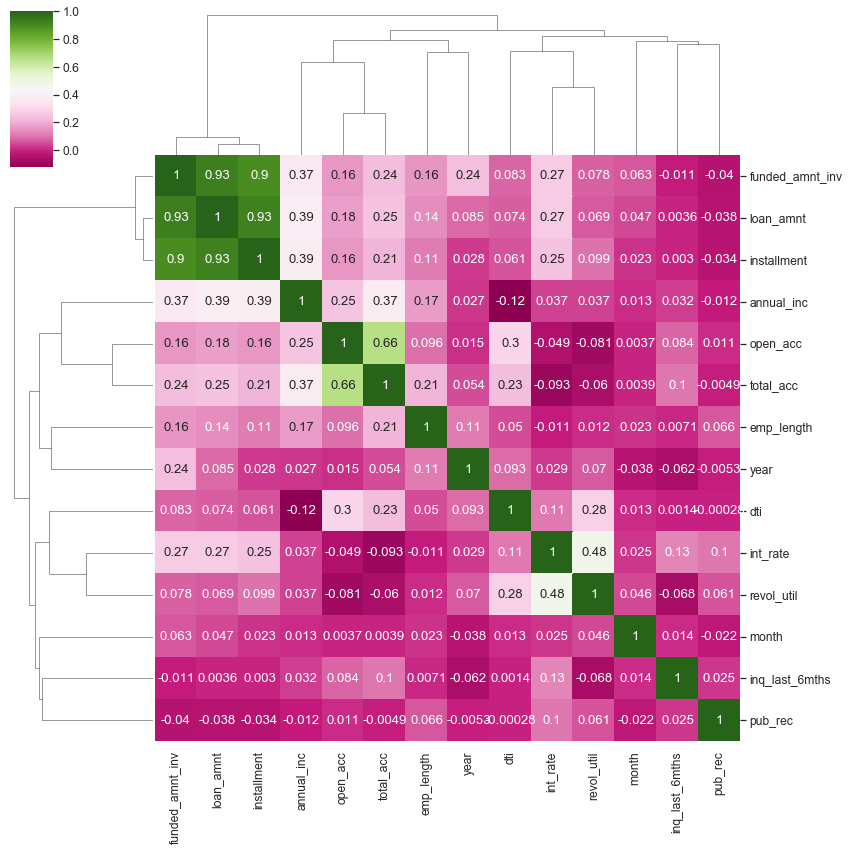

In [506]:
pcorrm = loan_df.corr()
sns.set(font_scale=1.1)
sns.clustermap(pcorrm, annot=True, figsize=(12, 12), cmap='PiYG')
plt.show()

# high correlation between loan_amnt, funded_amnt_inv, installment

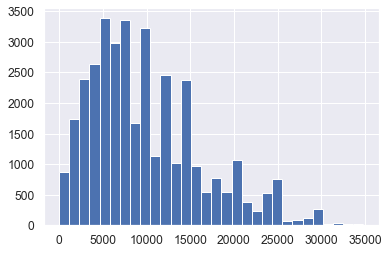

In [507]:
plt.hist(loan_df['funded_amnt_inv'], bins=30)
plt.show()

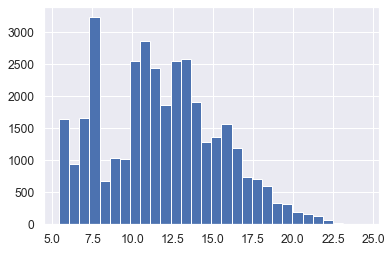

In [508]:
plt.hist(loan_df['int_rate'], bins=30)
plt.show()

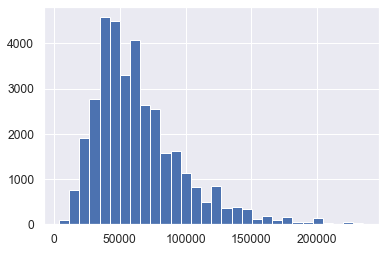

In [509]:
plt.hist(loan_df['annual_inc'], bins=30)
plt.show()

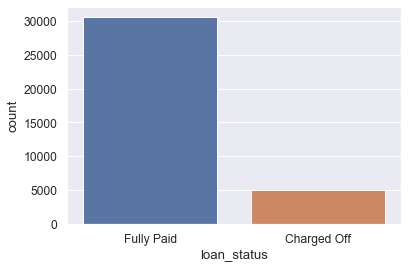

In [510]:
sns.countplot(x = 'loan_status', data = loan_df)

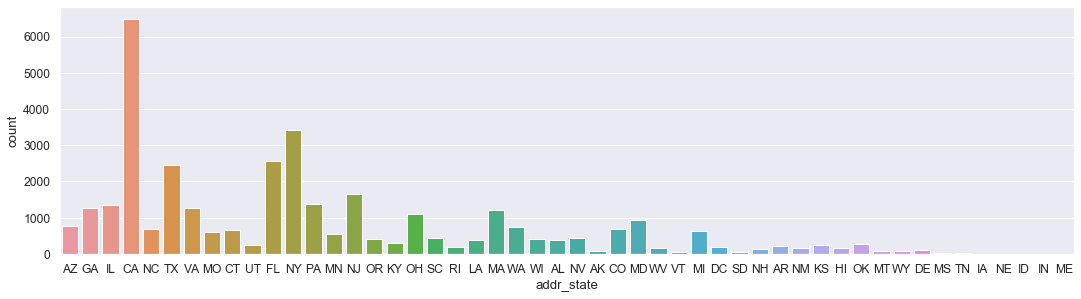

In [511]:
fig, ax = plt.subplots(figsize = (40,10))
plt.subplot(221)
sns.countplot(x ='addr_state', data = loan_df)

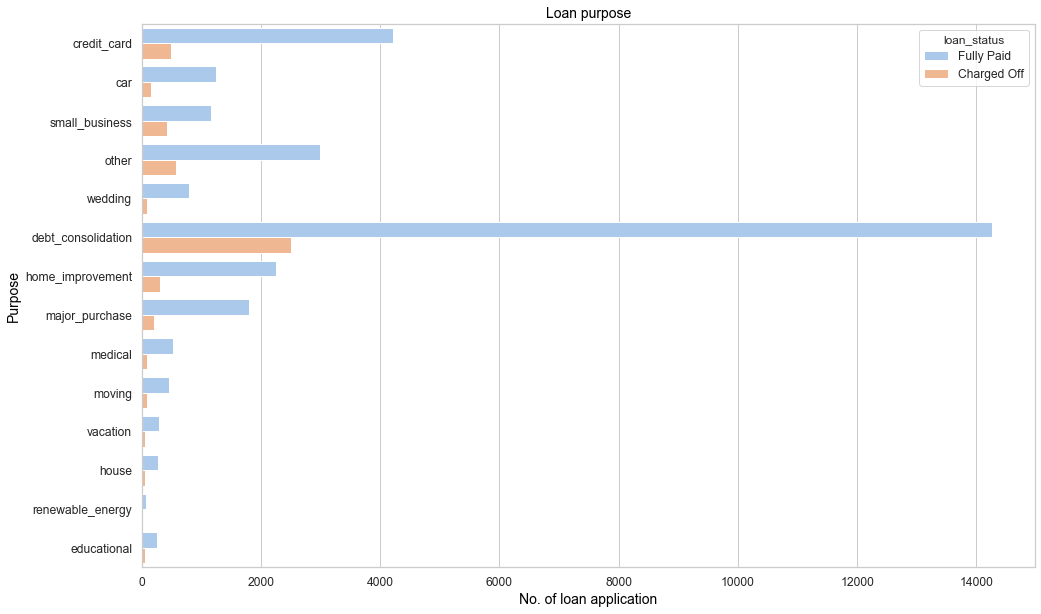

In [513]:
plt.figure(figsize=(16,10))
sns.set_style("whitegrid")
plotting = sns.countplot(y='purpose', data=loan_df, hue='loan_status', palette='pastel')
plotting.set_title('Loan purpose', fontsize=14, color='black')
plotting.set_ylabel('Purpose', fontsize=14, color='black')
plotting.set_xlabel('No. of loan application', fontsize=14, color='black')
plt.show()

# most of the loans taken for debt consolidation

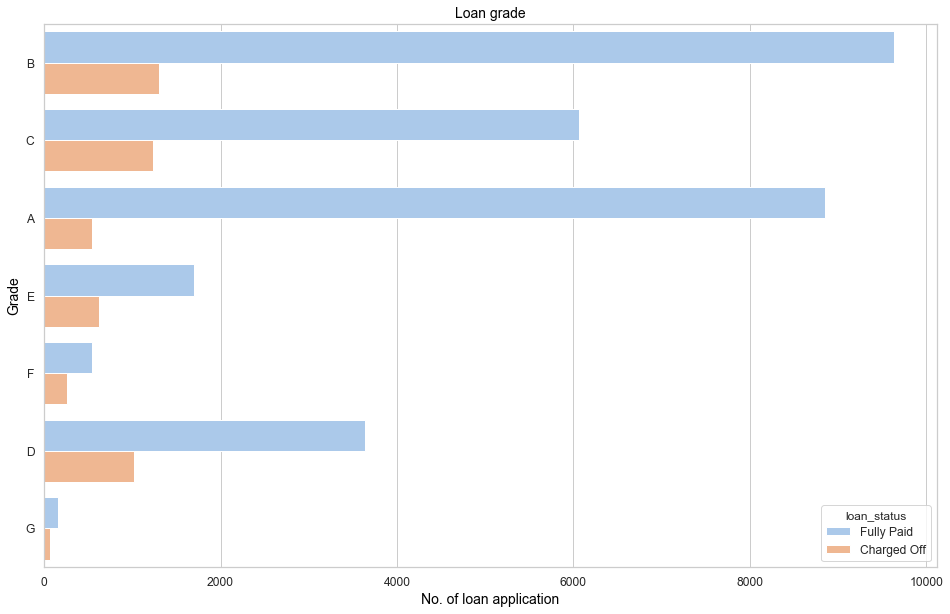

In [514]:
plt.figure(figsize=(16,10))
sns.set_style("whitegrid")
plotting = sns.countplot(y='grade', data=loan_df, hue='loan_status', palette='pastel')
plotting.set_title('Loan grade', fontsize=14, color='black')
plotting.set_ylabel('Grade', fontsize=14, color='black')
plotting.set_xlabel('No. of loan application', fontsize=14, color='black')
plt.show()

#

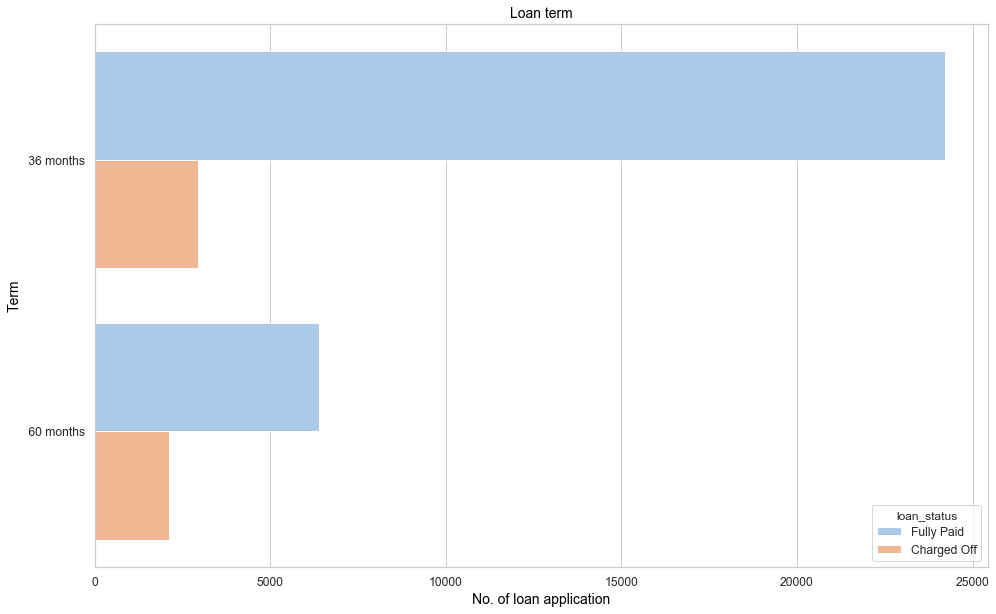

In [515]:
plt.figure(figsize=(16,10))
sns.set_style("whitegrid")
plotting = sns.countplot(y='term', data=loan_df, hue='loan_status', palette='pastel')
plotting.set_title('Loan term', fontsize=14, color='black')
plotting.set_ylabel('Term', fontsize=14, color='black')
plotting.set_xlabel('No. of loan application', fontsize=14, color='black')
plt.show()

## Bivariate Analysis

In [516]:
#now lets create some bins

loan_df['annual_inc_bin'] = pd.cut(loan_df['annual_inc'], [0, 20000, 40000, 60000, 80000,1000000], 
                                 labels=['0-20000', '20000-40000', '40000-60000', '60000-80000', '80000 +'])

loan_df['loan_amnt_bin'] = pd.cut(loan_df['loan_amnt'], [0, 5000, 10000, 15000, 20000, 25000, 36000], 
                                labels=['0-5000', '5000-10000', '10000-15000', '15000-20000', '20000-25000','25000+'])

loan_df['int_rate_bin'] = pd.cut(loan_df['int_rate'], [0, 5, 10, 15, 20, 25], 
                                 labels=['0-5', '5-10', '10-15', '15-20', '20+'])

loan_df['funded_amnt_inv_bin'] = pd.cut(loan_df['funded_amnt_inv'], [0, 5000, 10000, 15000, 20000, 25000, 30000, 35000], 
                                          labels=['0-5k','5-10k','10-15k','15-20k','20-25k','25-30k','30-35k'])

In [517]:
loan_df.head()

,loan_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_util,total_acc,year,month,annual_inc_bin,loan_amnt_bin,int_rate_bin,funded_amnt_inv_bin
0,5000,4975.0,36 months,10.65,162.87,B,B2,10,RENT,24000.0,...,3,0,83.7,9,2011,12,20000-40000,0-5000,10-15,0-5k
1,2500,2500.0,60 months,15.27,59.83,C,C4,1,RENT,30000.0,...,3,0,9.4,4,2011,12,20000-40000,0-5000,15-20,0-5k
2,2400,2400.0,36 months,15.96,84.33,C,C5,10,RENT,12252.0,...,2,0,98.5,10,2011,12,0-20000,0-5000,15-20,0-5k
3,10000,10000.0,36 months,13.49,339.31,C,C1,10,RENT,49200.0,...,10,0,21.0,37,2011,12,40000-60000,5000-10000,10-15,5-10k
5,5000,5000.0,36 months,7.90,156.46,A,A4,3,RENT,36000.0,...,9,0,28.3,12,2011,12,20000-40000,0-5000,5-10,0-5k


Text(0, 0.5, 'Charged Off count')

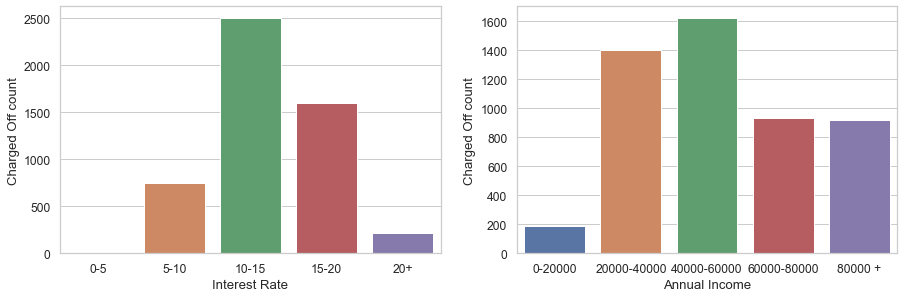

In [518]:
fig, ax = plt.subplots(figsize = (15,10))
plt.subplot(221)
sns.countplot(x='int_rate_bin', data=loan_df[loan_df.loan_status == 'Charged Off'])
plt.xlabel('Interest Rate')
plt.ylabel('Charged Off count')
plt.subplot(222)
sns.countplot(x='annual_inc_bin', data=loan_df[loan_df.loan_status == 'Charged Off'])
plt.xlabel('Annual Income')
plt.ylabel('Charged Off count')

Text(0, 0.5, 'Charged Off count')

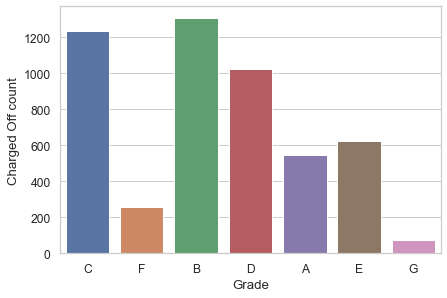

In [519]:
fig, ax = plt.subplots(figsize = (15,10))
plt.subplot(221)
sns.countplot(x='grade', data=loan_df[loan_df.loan_status == 'Charged Off'])
plt.xlabel('Grade')
plt.ylabel('Charged Off count')

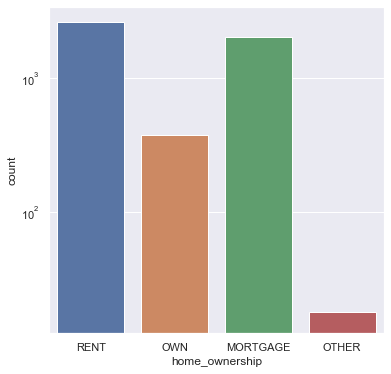

In [531]:
fig, ax = plt.subplots(figsize = (6,6))
ax.set(yscale = 'log')
sns.countplot(x='home_ownership', data=loan_df[loan_df['loan_status']=='Charged Off'])

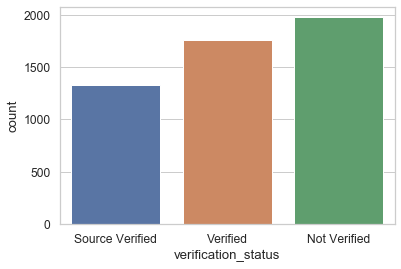

In [520]:
sns.countplot(x='verification_status', data=loan_df[loan_df['loan_status']=='Charged Off'])

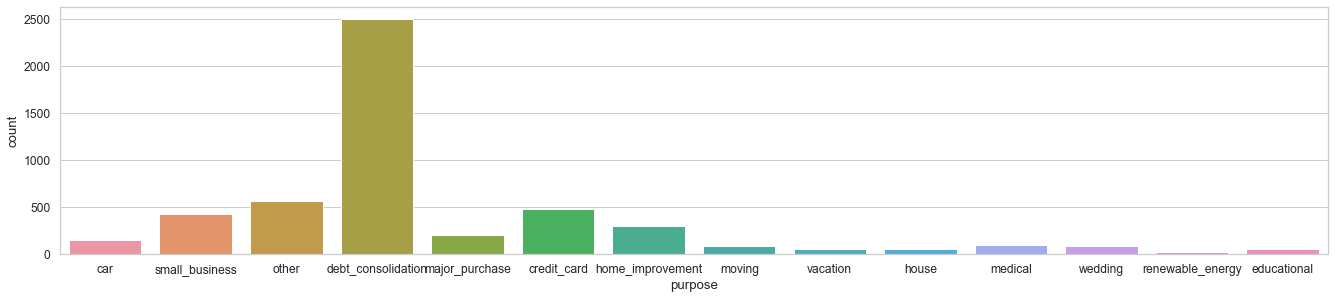

In [522]:
fig, ax = plt.subplots(figsize = (50,10))
plt.subplot(221)
sns.countplot(x='purpose', data=loan_df[loan_df['loan_status']=='Charged Off'])

Text(0.5, 0, 'Charged Off count')

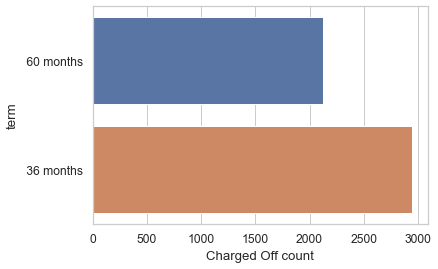

In [523]:
sns.countplot(y='term', data=loan_df[loan_df['loan_status']=='Charged Off'])
plt.xlabel('Charged Off count')

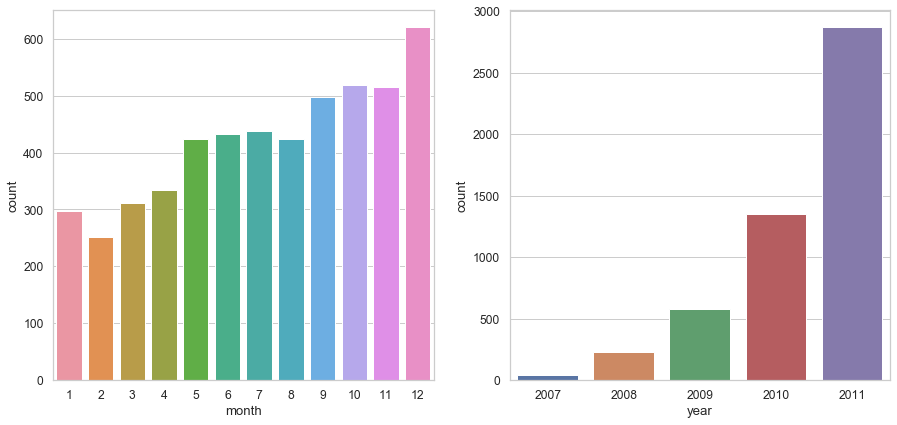

In [524]:
plt.figure(figsize=(15,15))
plt.subplot(221)
sns.countplot(x='month', data=loan_df[loan_df['loan_status']=='Charged Off'])
plt.subplot(222)
sns.countplot(x='year', data=loan_df[loan_df['loan_status']=='Charged Off'])

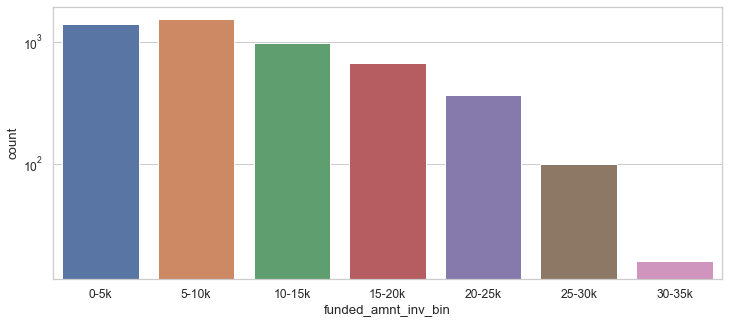

In [525]:
fig,ax = plt.subplots(figsize = (12,5))
ax.set_yscale('log')
sns.countplot(x='funded_amnt_inv_bin', data=loan_df[loan_df['loan_status']=='Charged Off'])

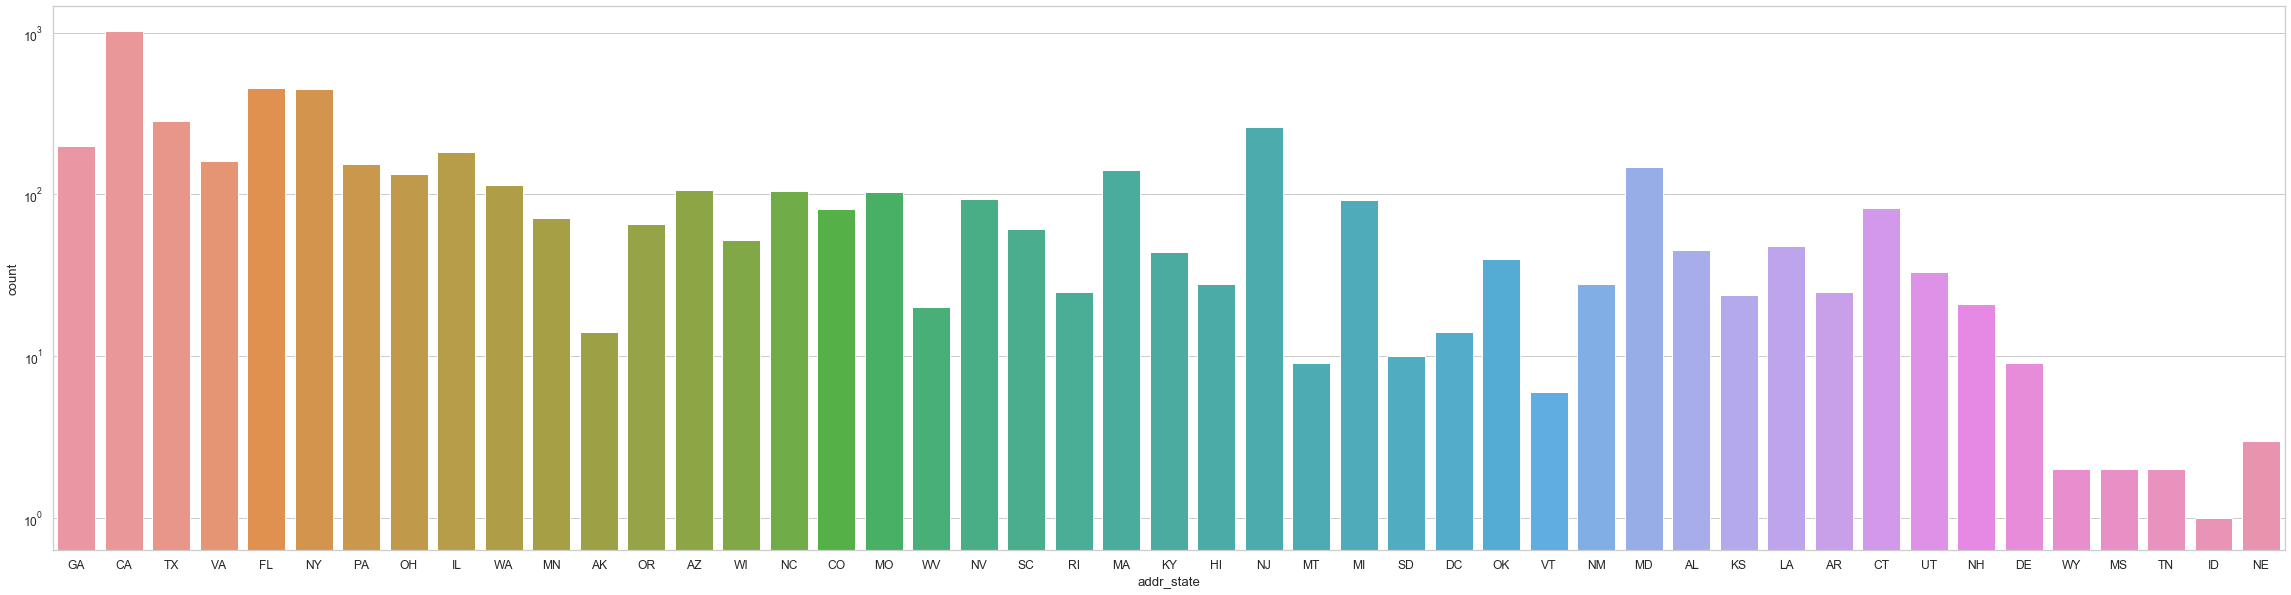

In [526]:
fig,ax = plt.subplots(figsize = (40,10))
ax.set_yscale('log')
sns.countplot(x='addr_state', data=loan_df[loan_df['loan_status']=='Charged Off'])

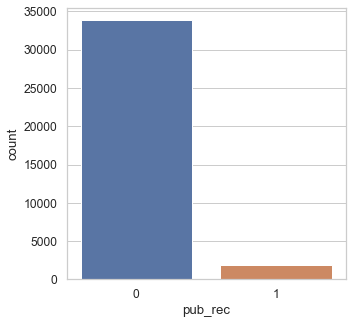

In [527]:
fig,ax = plt.subplots(figsize = (5,5))
sns.countplot(x='pub_rec', data=loan_df)

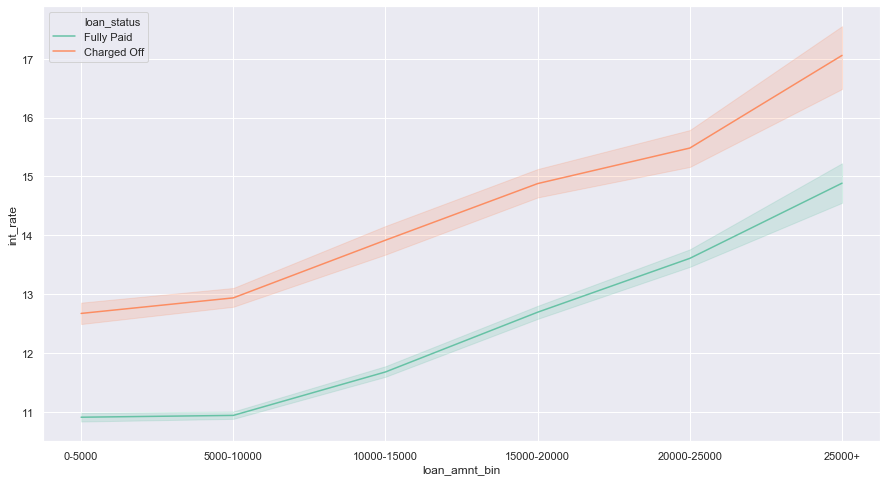

In [528]:
sns.set(rc = {'figure.figsize':(15,8)})
sns.lineplot(data=loan_df, y='int_rate', x='loan_amnt_bin', hue='loan_status', palette='Set2')

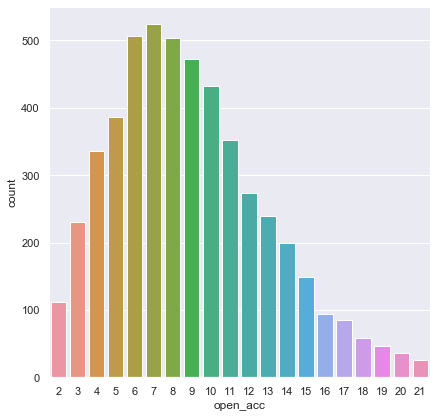

In [529]:
plt.figure(figsize=(15,15))
plt.subplot(221)
sns.countplot(x='open_acc', data=loan_df[loan_df['loan_status']=='Charged Off'])

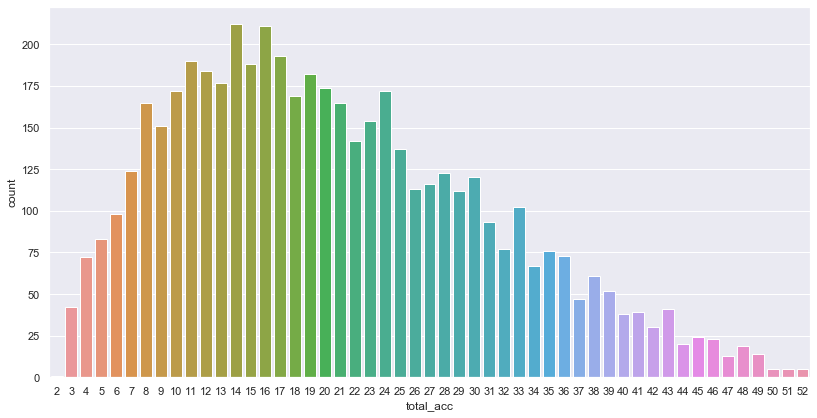

In [530]:
plt.figure(figsize=(30,15))
plt.subplot(222)
sns.countplot(x='total_acc', data=loan_df[loan_df['loan_status']=='Charged Off'])

### Observations
## From the above analysis we can infer the below points:
1. Maximum loans taken to repay other loans.
2. Maximum loans defaulted for Debt Consolidation.
3. High correlation between loan_amnt, funded_amnt_inv, installment.
4. Interest rate arount 7.5% is most frequent.
5. Maximum loans taken in CA state.
6. Rented home owners defaulted the most.
7. Grade B loans has the most number of Fully Paid as well as Charged Off status.
8. 60 months tenure has maximum defaulters.
9. Defaulters come in the bucket of 10-15% interest rate
   and 40-60k income.
10. Applicants are more likely to default when their credentials are not verified.
11. 2011 has maximum defaulters.
12. Maximum loans defaulted when funded_amnt_inv is 5-10k.